In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('C:/Users/Ayushi/Downloads/TelcoChurn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
df.shape

(7043, 21)

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df['customerID'].isnull().sum()

0

In [20]:
df=df.drop(['customerID'],axis=1)

In [21]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [22]:
df['target']= np.where(df['Churn']=="Yes",1,0)

In [23]:
df=df.drop(['Churn'],axis=1)

In [24]:
Y=df[['target']]                       #defining target feature
X=df.drop(['target'],axis=1)           #defining independent features

In [25]:
Y.mean()                    #churn rate

target    0.26537
dtype: float64

In [26]:
#splitting features into Numerical and Categorical
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [27]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [28]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [29]:
#outlier analysis
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0,0.95,0.99]).T

,count,mean,std,min,0%,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,95%,99%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000,1.00,1.000,1.000,1.00
tenure,7043.0,32.371149,24.559481,0.00,0.00,1.000,1.00,2.00,9.00,12.00,20.00,29.00,40.00,55.00,65.000,69.00,72.000,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,18.25,19.200,19.65,20.05,35.50,45.85,58.83,70.35,79.10,89.85,98.550,102.60,107.400,114.729,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,18.80,19.871,49.07,83.47,398.55,548.40,939.78,1394.55,2043.71,3786.60,5195.485,5973.69,6921.025,8039.256,8684.80


In [30]:
#outlier treatment
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.05))
    x=x.clip(upper=x.quantile(0.95))
    return(x)

In [31]:
num=num.apply(lambda x : outlier_cap(x))

In [32]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,85%,90%,99%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.00,0.00,0.00,0.00,1.000,1.00,1.000,1.000
tenure,7043.0,32.372710,24.557454,1.00,1.00,1.000,2.00,9.00,29.00,55.00,65.000,69.00,72.000,72.000
MonthlyCharges,7043.0,64.566357,29.747902,19.65,19.65,19.650,20.05,35.50,70.35,89.85,98.550,102.60,107.400,107.400
TotalCharges,7043.0,2246.127358,2185.556691,49.07,49.07,49.088,83.47,398.55,1394.55,3786.60,5195.485,5973.69,6921.025,6921.025


In [33]:
#missing value analysis
num.isnull().mean()

SeniorCitizen     0.0
tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64

In [34]:
#No missing value in the dataset

In [35]:
#Numerical feature selection
#remove features with 0 variance
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]
num_1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1.0,29.85,49.070
1,0,34.0,56.95,1889.500
2,0,2.0,53.85,108.150
3,0,45.0,42.30,1840.750
4,0,2.0,70.70,151.650
...,...,...,...,...
7038,0,24.0,84.80,1990.500
7039,0,72.0,103.20,6921.025
7040,0,11.0,29.60,346.450
7041,1,4.0,74.40,306.600


In [36]:
num_1.iloc[0]

SeniorCitizen      0.00
tenure             1.00
MonthlyCharges    29.85
TotalCharges      49.07
Name: 0, dtype: float64

In [46]:
num_1=num_1.drop(['SeniorCitizen'],axis=1)

In [47]:
#bivariate analysis
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


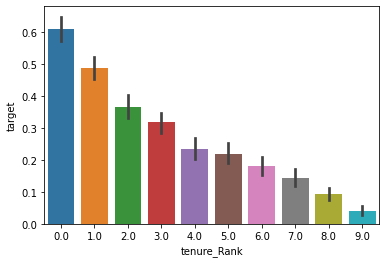

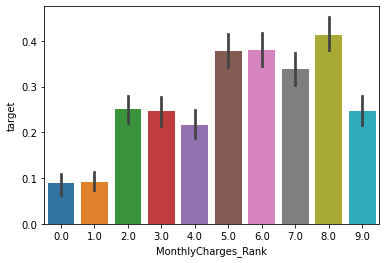

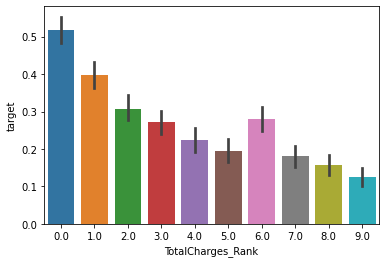

In [48]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [49]:
# All features from num_1 will get selected due to good discrimination
select_features_df_num=num_1

In [50]:
num_1.shape

(7043, 3)

In [51]:
#categorical feature selection
#Bivariate analysis

In [52]:
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

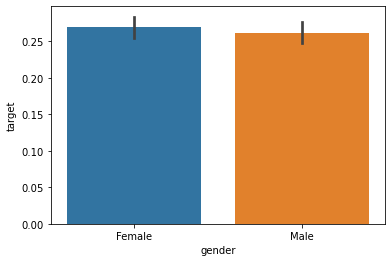

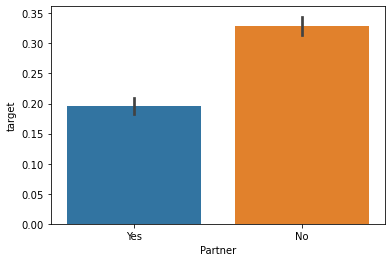

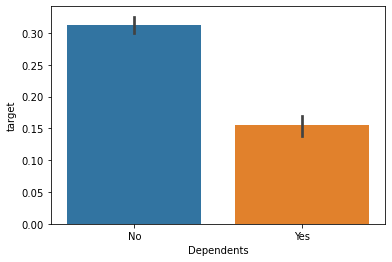

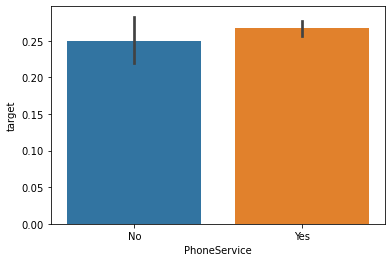

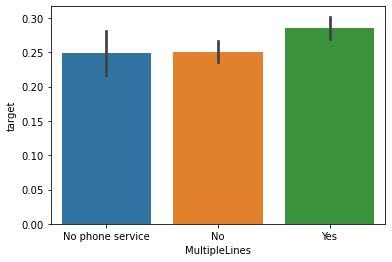

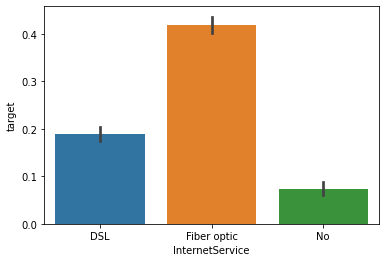

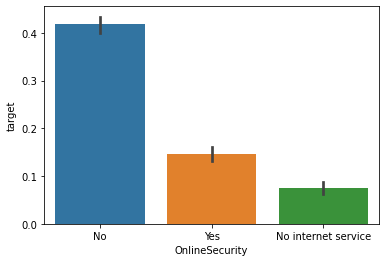

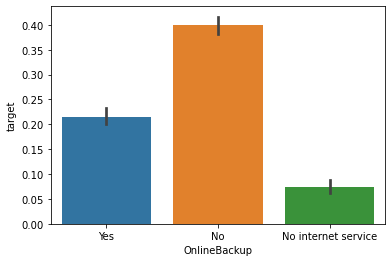

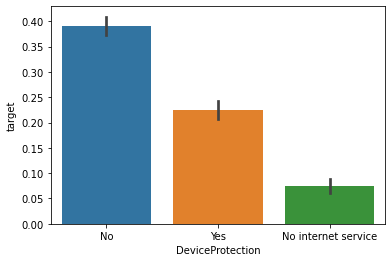

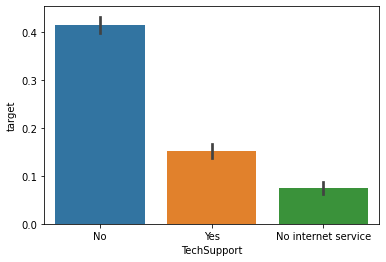

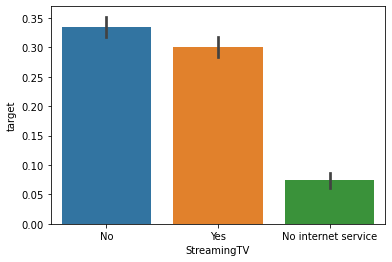

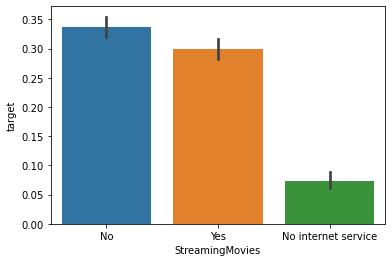

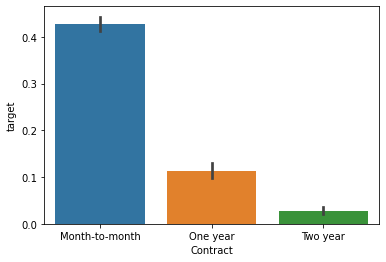

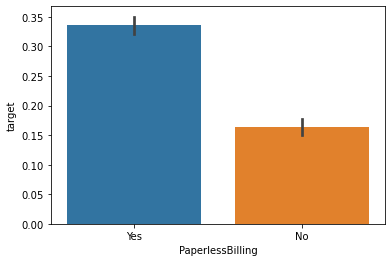

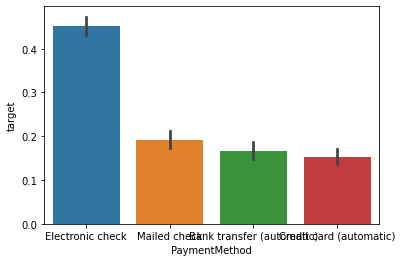

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [54]:
char=char.drop(['gender','PhoneService','MultipleLines'],axis=1)

In [55]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(7043, 22)

In [56]:
X_char_dum

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,1,1,1,0,0,0,0,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [57]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [58]:
select_features_df_char.iloc[0]

Partner_Yes                              1
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         1
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingMovies_No internet service      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     1
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           1
PaymentMethod_Mailed check               0
Name: 0, dtype: uint8

In [60]:
# Creating the Master Feature Set for Model Development

In [62]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")
X_all

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1.0,29.85,49.070
1,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,34.0,56.95,1889.500
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,2.0,53.85,108.150
3,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,45.0,42.30,1840.750
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,2.0,70.70,151.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,24.0,84.80,1990.500
7039,1,1,1,0,0,0,0,1,0,1,...,0,1,0,1,1,0,0,72.0,103.20,6921.025
7040,1,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,11.0,29.60,346.450
7041,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,4.0,74.40,306.600


In [63]:
Y['target'].value_counts()

0    5174
1    1869
Name: target, dtype: int64

In [64]:
#Train Test split

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [66]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (4930, 23)
Shape of Testing Data (2113, 23)
Response Rate in Training Data target    0.266126
dtype: float64
Response Rate in Testing Data target    0.263606
dtype: float64


In [67]:
#1.Logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

C:\Users\Ayushi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ayushi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [68]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,0.047767
1,Dependents_Yes,-0.121269
2,InternetService_Fiber optic,0.615965
3,InternetService_No,-0.183742
4,OnlineSecurity_No internet service,-0.183742
5,OnlineSecurity_Yes,-0.627980
6,OnlineBackup_No internet service,-0.183742
7,OnlineBackup_Yes,-0.303651
8,DeviceProtection_No internet service,-0.183742
9,DeviceProtection_Yes,0.012244


In [69]:
#2.Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [70]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 50}


In [71]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=0)

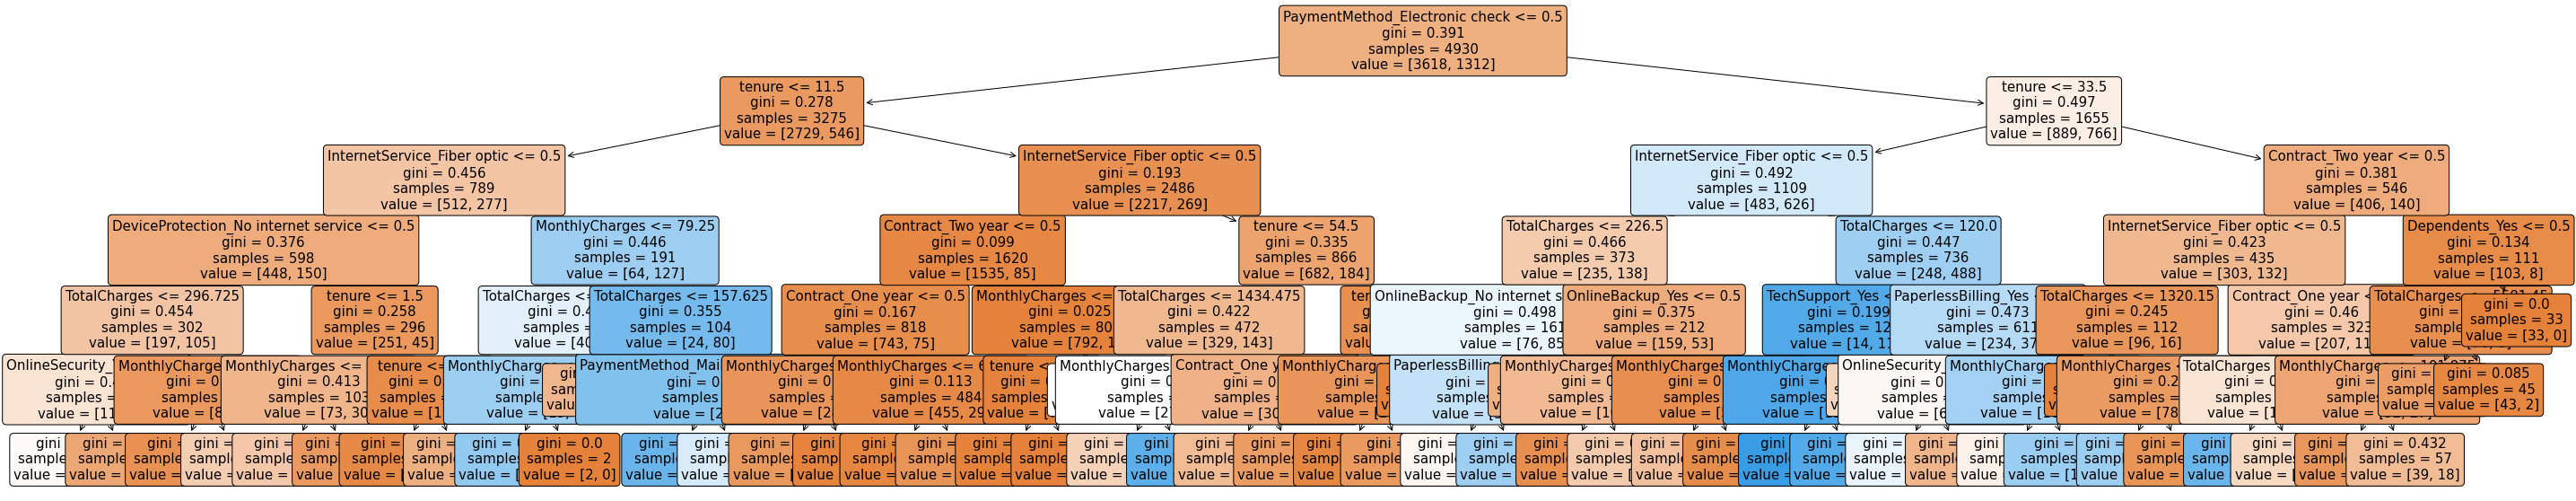

In [73]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [74]:
#3.Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(X_train,y_train)

C:\Users\Ayushi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [75]:
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.207650
TotalCharges,0.180350
MonthlyCharges,0.177098
PaymentMethod_Electronic check,0.136833
InternetService_Fiber optic,0.128984
Contract_Two year,0.037681
Contract_One year,0.035787
PaperlessBilling_Yes,0.019343
OnlineSecurity_Yes,0.017066
TechSupport_Yes,0.013163


In [76]:
base_learner = [
                        ('gbm', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50))  
                       ] 

In [77]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [78]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [79]:
#1.Logistic regression
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.7960246095598675
Precision 0.6346153846153846
Recall 0.533213644524237
f1_score 0.5795121951219513


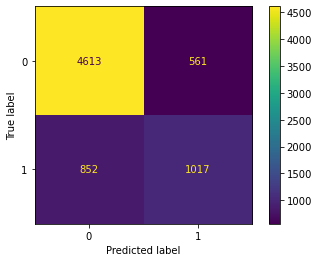

In [80]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [81]:
#2.Decision tree
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.7936583057264552
Precision 0.6516290726817042
Recall 0.466786355475763
f1_score 0.5439330543933054


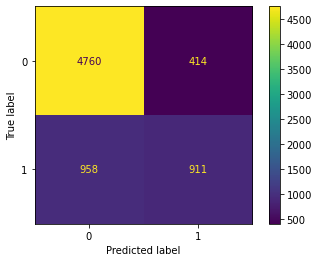

In [82]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [83]:
#3.Gradient boost
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.7950780880265026
Precision 0.6336206896551724
Recall 0.5278276481149012
f1_score 0.5759059745347697


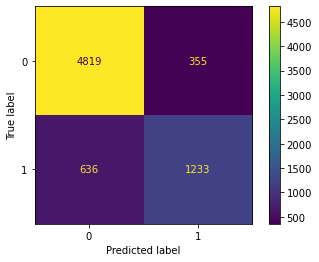

In [84]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [85]:
# Lorenz Curve
#1.Logistic regresssion

In [86]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_logreg,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.754610,0.729633,532.0,532.0,0.284644,0.284644,173.0,173.0,0.033436,0.033436,0.2512,0.100099,0.100099,1
1,9,704,0.578125,0.594515,407.0,939.0,0.217764,0.502408,297.0,470.0,0.057402,0.090839,0.4116,0.099957,0.200057,2
2,8,704,0.441761,0.463943,311.0,1250.0,0.166399,0.668807,393.0,863.0,0.075957,0.166796,0.5020,0.099957,0.300014,3
3,7,704,0.308239,0.334489,217.0,1467.0,0.116105,0.784912,487.0,1350.0,0.094124,0.260920,0.5240,0.099957,0.399972,4
4,6,704,0.217330,0.221670,153.0,1620.0,0.081862,0.866774,551.0,1901.0,0.106494,0.367414,0.4994,0.099957,0.499929,5
5,5,705,0.170213,0.146100,120.0,1740.0,0.064205,0.930979,585.0,2486.0,0.113065,0.480479,0.4505,0.100099,0.600028,6
6,4,704,0.092330,0.092778,65.0,1805.0,0.034778,0.965757,639.0,3125.0,0.123502,0.603981,0.3618,0.099957,0.699986,7
7,3,704,0.049716,0.052490,35.0,1840.0,0.018727,0.984484,669.0,3794.0,0.129300,0.733282,0.2512,0.099957,0.799943,8
8,2,704,0.026989,0.026719,19.0,1859.0,0.010166,0.994650,685.0,4479.0,0.132393,0.865675,0.1290,0.099957,0.899901,9
9,1,705,0.014184,0.009552,10.0,1869.0,0.005350,1.000000,695.0,5174.0,0.134325,1.000000,0.0000,0.100099,1.000000,10


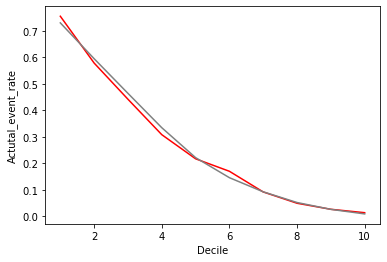

In [87]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [88]:
#2.Decision tree

In [89]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.746099,0.765365,526.0,526.0,0.281434,0.281434,179.0,179.0,0.034596,0.034596,0.2468,0.100099,0.100099,1
1,9,704,0.603693,0.614556,425.0,951.0,0.227394,0.508828,279.0,458.0,0.053923,0.088520,0.4203,0.099957,0.200057,2
2,8,704,0.417614,0.434500,294.0,1245.0,0.157303,0.666132,410.0,868.0,0.079242,0.167762,0.4984,0.099957,0.300014,3
3,7,704,0.342330,0.330718,241.0,1486.0,0.128946,0.795078,463.0,1331.0,0.089486,0.257248,0.5378,0.099957,0.399972,4
4,6,704,0.203125,0.204955,143.0,1629.0,0.076512,0.871589,561.0,1892.0,0.108427,0.365675,0.5059,0.099957,0.499929,5
5,5,705,0.160284,0.154631,113.0,1742.0,0.060460,0.932049,592.0,2484.0,0.114418,0.480093,0.4520,0.100099,0.600028,6
6,4,704,0.110795,0.098992,78.0,1820.0,0.041734,0.973783,626.0,3110.0,0.120990,0.601082,0.3727,0.099957,0.699986,7
7,3,704,0.041193,0.037890,29.0,1849.0,0.015516,0.989299,675.0,3785.0,0.130460,0.731542,0.2578,0.099957,0.799943,8
8,2,704,0.017045,0.016893,12.0,1861.0,0.006421,0.995720,692.0,4477.0,0.133746,0.865288,0.1304,0.099957,0.899901,9
9,1,705,0.011348,0.003096,8.0,1869.0,0.004280,1.000000,697.0,5174.0,0.134712,1.000000,0.0000,0.100099,1.000000,10


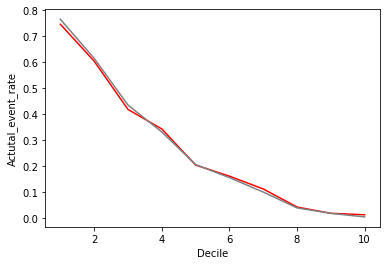

In [90]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [ ]:
#3.Gradient boost

In [91]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.914894,0.816566,645.0,645.0,0.345104,0.345104,60.0,60.0,0.011596,0.011596,0.3335,0.100099,0.100099,1
1,9,704,0.683239,0.624154,481.0,1126.0,0.257357,0.602461,223.0,283.0,0.043100,0.054697,0.5478,0.099957,0.200057,2
2,8,704,0.501420,0.460450,353.0,1479.0,0.188871,0.791332,351.0,634.0,0.067839,0.122536,0.6688,0.099957,0.300014,3
3,7,704,0.264205,0.309585,186.0,1665.0,0.099518,0.890851,518.0,1152.0,0.100116,0.222652,0.6682,0.099957,0.399972,4
4,6,704,0.146307,0.190930,103.0,1768.0,0.055110,0.945960,601.0,1753.0,0.116158,0.338809,0.6072,0.099957,0.499929,5
5,5,705,0.070922,0.118445,50.0,1818.0,0.026752,0.972713,655.0,2408.0,0.126595,0.465404,0.5073,0.100099,0.600028,6
6,4,704,0.039773,0.070556,28.0,1846.0,0.014981,0.987694,676.0,3084.0,0.130653,0.596057,0.3916,0.099957,0.699986,7
7,3,704,0.022727,0.035015,16.0,1862.0,0.008561,0.996255,688.0,3772.0,0.132973,0.729030,0.2672,0.099957,0.799943,8
8,2,704,0.008523,0.016151,6.0,1868.0,0.003210,0.999465,698.0,4470.0,0.134905,0.863935,0.1355,0.099957,0.899901,9
9,1,705,0.001418,0.009368,1.0,1869.0,0.000535,1.000000,704.0,5174.0,0.136065,1.000000,0.0000,0.100099,1.000000,10


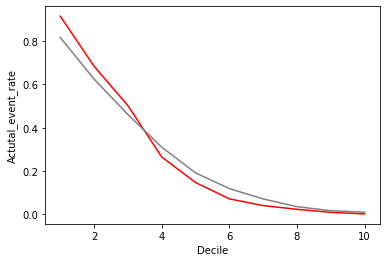

In [92]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [93]:
# Project Conclusion :- 
# The GBM Model has performed the best and will be used for Customer targeting 

In [94]:
df['Tenure_Rank']=pd.qcut(df['tenure'].rank(method='first').values,10,duplicates='drop').codes+1

In [95]:
df.groupby('Tenure_Rank')['tenure'].agg(['min','max','mean'])

,min,max,mean
Tenure_Rank,,,
1,0,2,1.099291
2,2,6,3.566761
3,6,12,8.779830
4,12,20,15.531250
5,20,29,24.153191
6,29,40,34.004261
7,40,50,45.014205
8,50,60,55.370739
9,60,69,65.001420


In [96]:
df['tenure'].mean()

32.37114865824223

In [97]:
df['Tenure_Segment']=np.where(df['Tenure_Rank']<=6,"Low Tenure","High Tenure")

In [98]:
df['MonthlyCharges_Rank']=pd.qcut(df['MonthlyCharges'].rank(method='first').values,10,duplicates='drop').codes+1

In [99]:
df.groupby('MonthlyCharges_Rank')['MonthlyCharges'].agg(['min','max','mean'])

,min,max,mean
MonthlyCharges_Rank,,,
1,18.25,20.05,19.622482
2,20.05,25.05,21.732599
3,25.05,45.85,35.514773
4,45.85,58.75,52.532244
5,58.85,70.35,65.314965
6,70.35,79.10,74.623864
7,79.10,85.50,82.140057
8,85.50,94.25,89.840199
9,94.25,102.60,98.036364


In [100]:
df['MonthlyCharges'].mean()

64.76169246059922

In [101]:
df['Monthly_Charge_Segment']=np.where(df['MonthlyCharges_Rank']<=5,"Low Charges","High Charges")

In [102]:
df['Predicted_Churn_Rank']=np.where(df['P_Rank_GBM']>=8,"Top 3","Bottom 7")

In [ ]:
# Slice the data with respect to Top 4 and Bottom 6 Probability Ranks from the GBM Model

In [103]:
df_top3=df.loc[df['Predicted_Churn_Rank']=='Top 3',:]

In [104]:
service_list=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling']
target=['target']

total=service_list+target

In [105]:
df_top3_services=df_top3[service_list]

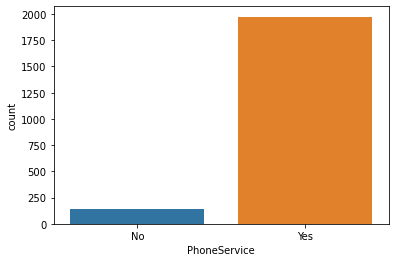

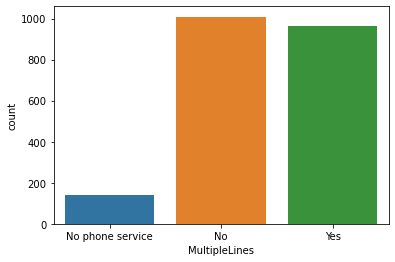

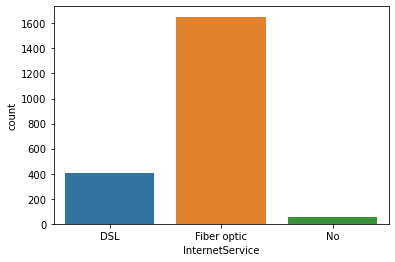

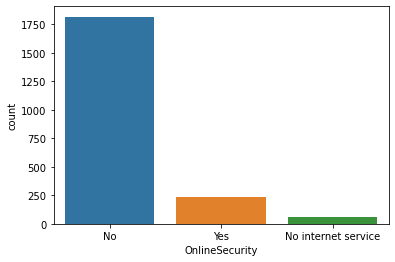

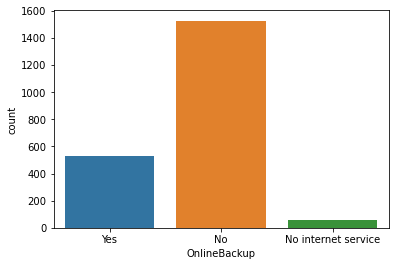

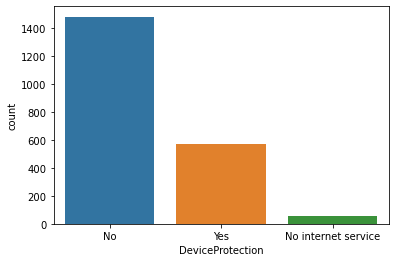

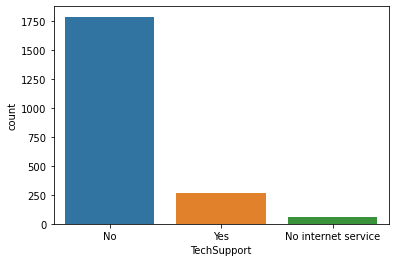

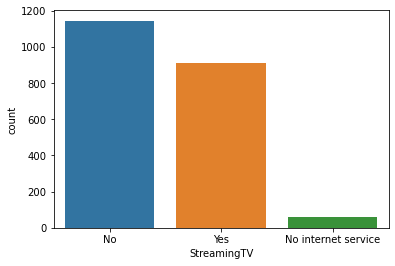

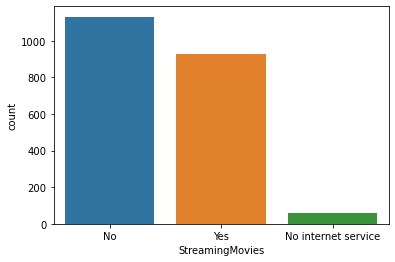

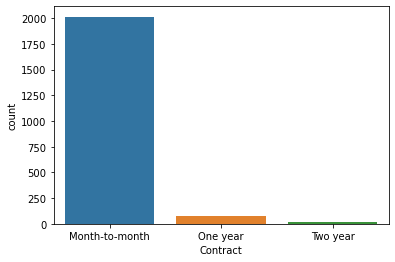

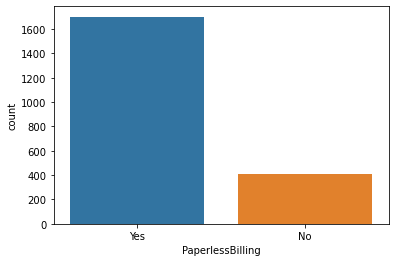

In [107]:
for col in (df_top3_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top3_services)
plt.show()

In [108]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['MonthlyCharges'],aggfunc='mean')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,99.893780,86.692542
Low Charges,42.554167,48.480623


In [109]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['target'],aggfunc='count')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,209,1314
Low Charges,12,578


In [110]:
# Recommendations
# Device Protection with Online Services
# Convert customer to DSL if they are facing challenges with Fiber Optics
# Offer discounts on Yearly contracts